# Titanic Survival Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

So today i am going to analyse the titanic data present in train.csv file to make a model that will predict the survival probability of the person on the ship.
So lets start!!!!!!!

What is the goal of this project?
- Predict survival on the Titanic

What is the target variable?
- Survived

What type of ML problem is this?
- Classification


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('drive/MyDrive/Titanic/train.csv')
test=pd.read_csv('drive/MyDrive/Titanic/test.csv')

In [4]:
print(train.shape)
print(test.shape)


(891, 12)
(418, 11)


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the test dataset we need to predict the survival of the people. So test doesnt have the survival column

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
100-((714/891)*100)

19.86531986531986

Train have 19.86% of NAN age Embarked Locations

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
100-((332/418)*100)

20.57416267942584

Same for test having 20.57% NAN values

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
eg=train.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [13]:

eg

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [14]:
#LEts look for correlation
import seaborn as sns

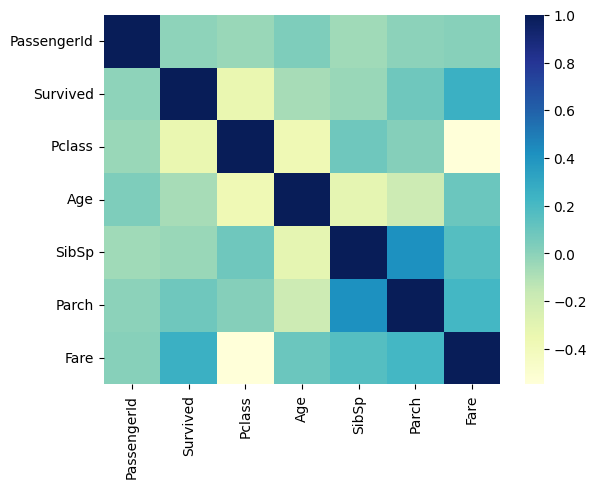

In [15]:
sns.heatmap(eg.corr(),cmap="YlGnBu")
plt.show()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(train,train[["Survived",'Pclass','Sex']]):
  s_train=train.loc[train_indices]
  s_test=train.loc[test_indices]

In [18]:
s_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
722,723,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,NaN,Q


In [19]:
s_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


<Axes: >

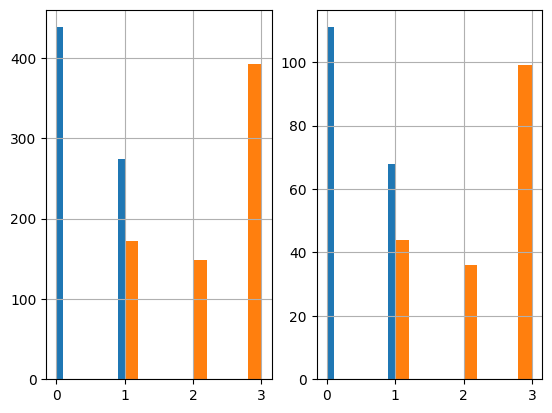

In [20]:
plt.subplot(1,2,1)
s_train['Survived'].hist()
s_train['Pclass'].hist()

plt.subplot(1,2,2)
s_test['Survived'].hist()
s_test['Pclass'].hist()

In [21]:
s_train.info()
#age is missing for alot of data

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 388 to 710
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          579 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [23]:
class AgeImputer(BaseEstimator,TransformerMixin):
  def fit(self,x,y=None):
    return self
  def transform(self,x):
    imputer=SimpleImputer(strategy="mean")
    x['Age']=imputer.fit_transform(x[['Age']])
    return x

In [24]:
from sklearn.preprocessing import OneHotEncoder



In [25]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
  def fit(self,x,y=None):
    return self

  def transform(self,x):
    encoder=OneHotEncoder()
    matrix=encoder.fit_transform(x[["Embarked"]]).toarray()

    column_names=['C','S','Q','N']

    for i in range(len(matrix.T)):
      x[column_names[i]]=matrix.T[i]


    matrix=encoder.fit_transform(x[["Sex"]]).toarray()

    column_names=['Female','Male']
    for i in range(len(matrix.T)):
      x[column_names[i]]=matrix.T[i]

    return x

In [26]:
class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self,x,y=None):
    return self

  def transform(self,x):
    return x.drop(['Embarked','Name','Ticket','Cabin','Sex','N'],axis=1,errors='ignore')

In [27]:
from sklearn.pipeline import Pipeline


In [28]:
pipeline=Pipeline([
    ('ageimputer',AgeImputer()),
    ('featureencoder',FeatureEncoder()),
    ('featuredropper',FeatureDropper())
])

In [29]:
s_train=pipeline.fit_transform(s_train)

In [30]:
s_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
388,389,0,3,30.104214,0,0,7.7292,0.0,1.0,0.0,0.0,1.0
722,723,0,2,34.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
63,64,0,3,4.000000,3,2,27.9000,0.0,0.0,1.0,0.0,1.0
628,629,0,3,26.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
433,434,0,3,17.000000,0,0,7.1250,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,1,1,36.000000,0,0,26.2875,0.0,0.0,1.0,0.0,1.0
762,763,1,3,20.000000,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
112,113,0,3,22.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
278,279,0,3,7.000000,4,1,29.1250,0.0,1.0,0.0,0.0,1.0


In [31]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 388 to 710
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [32]:
from sklearn.preprocessing import StandardScaler

x=s_train.drop(['Survived'],axis=1)
y=s_train['Survived']

scaler=StandardScaler()
x_data=scaler.fit_transform(x)
y_data=y.to_numpy()

In [33]:
x_data

array([[-2.24363773e-01,  8.27893418e-01,  2.74807367e-16, ...,
        -1.59445557e+00, -7.35612358e-01,  7.35612358e-01],
       [ 1.08055454e+00, -3.70196244e-01,  3.01344478e-01, ...,
         6.27173325e-01, -7.35612358e-01,  7.35612358e-01],
       [-1.49411962e+00,  8.27893418e-01, -2.01919744e+00, ...,
         6.27173325e-01, -7.35612358e-01,  7.35612358e-01],
       ...,
       [-1.30267951e+00,  8.27893418e-01, -6.26872289e-01, ...,
         6.27173325e-01, -7.35612358e-01,  7.35612358e-01],
       [-6.54127291e-01,  8.27893418e-01, -1.78714325e+00, ...,
        -1.59445557e+00, -7.35612358e-01,  7.35612358e-01],
       [ 1.03367125e+00, -1.56828591e+00, -4.72169495e-01, ...,
        -1.59445557e+00,  1.35941164e+00, -1.35941164e+00]])

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
clf=RandomForestClassifier()
param_gird=[
    {"n_estimators": [10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]

grid_search=GridSearchCV(clf,param_gird,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [41]:
final_clf=grid_search.best_estimator_

In [42]:
final_clf

RandomForestClassifier(min_samples_split=4)

In [43]:
s_test=pipeline.fit_transform(s_test)

In [44]:
s_test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
507,508,1,1,27.961704,0,0,26.5500,0.0,0.0,1.0,0.0,1.0
210,211,0,3,24.000000,0,0,7.0500,0.0,0.0,1.0,0.0,1.0
687,688,0,3,19.000000,0,0,10.1708,0.0,0.0,1.0,0.0,1.0
619,620,0,2,26.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
321,322,0,3,27.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33,34,0,2,66.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
473,474,1,2,23.000000,0,0,13.7917,1.0,0.0,0.0,1.0,0.0
319,320,1,1,40.000000,1,1,134.5000,1.0,0.0,0.0,1.0,0.0
493,494,0,1,71.000000,0,0,49.5042,1.0,0.0,0.0,0.0,1.0


In [45]:
x_test=s_test.drop(['Survived'],axis=1)
y_test=s_test['Survived']

scaler=StandardScaler()
x_data_test=scaler.fit_transform(x_test)
y_data_test=y_test.to_numpy()

In [46]:
final_clf.score(x_data_test,y_data_test)

0.8268156424581006

In [47]:
final_train=pipeline.fit_transform(train)

In [48]:
final_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [49]:
x_final=final_train.drop(['Survived'],axis=1)
y_final=final_train['Survived']

scaler=StandardScaler()
x_data_final=scaler.fit_transform(x_final)
y_data_final=y_final.to_numpy()

In [50]:
prod_clf=RandomForestClassifier()
param_gird=[
    {"n_estimators": [10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]

grid_search=GridSearchCV(prod_clf,param_gird,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(x_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [51]:
prod_final_clf=grid_search.best_estimator_

In [52]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [53]:
final_test_data=pipeline.fit_transform(test)

In [55]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [58]:
x_final_test=final_test_data
x_final_test=x_final_test.fillna(method='ffill')

scaler=StandardScaler()
x_data_final_test=scaler.fit_transform(x_final_test)

/tmp/ipython-input-58-1780209167.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_final_test=x_final_test.fillna(method='ffill')


In [59]:
predictions=prod_final_clf.predict(x_data_final_test)

In [60]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
final_df=pd.DataFrame(test['PassengerId'])
final_df['Survived']=predictions
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
final_df.to_csv("drive/MyDrive/Titanic/prediction.csv",index=False)